In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#clean data
#check for all outliers
#check for all missing values
#check for the distribution of at least one variable (explore data)
#if missing values are more, replace missing values with mean
#come up with a data grouped according to the performance (depending on column name)
#rank your grouping in any order

In [3]:
df= pd.read_csv('unemployment_analysis.csv')

In [4]:
df.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


In [5]:
df.shape # 235 Rows, 33 columns.

(235, 33)

In [6]:
#create a copy of the original data 
df1= df.copy()

In [7]:
#get details about the data, No null values, two data set types Object(strings), float(decimals)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  235 non-null    object 
 1   Country Code  235 non-null    object 
 2   1991          235 non-null    float64
 3   1992          235 non-null    float64
 4   1993          235 non-null    float64
 5   1994          235 non-null    float64
 6   1995          235 non-null    float64
 7   1996          235 non-null    float64
 8   1997          235 non-null    float64
 9   1998          235 non-null    float64
 10  1999          235 non-null    float64
 11  2000          235 non-null    float64
 12  2001          235 non-null    float64
 13  2002          235 non-null    float64
 14  2003          235 non-null    float64
 15  2004          235 non-null    float64
 16  2005          235 non-null    float64
 17  2006          235 non-null    float64
 18  2007          235 non-null    

In [8]:
#check the columns in the data set
df1.columns

Index(['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [9]:
#rename the columns 'Country Name', 'Country Code'
df1.rename(columns ={"Country Name": "country_name", "Country Code":"country_code"}, inplace=True)



In [10]:
df1.columns #check to see changes

Index(['country_name', 'country_code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [11]:
#Take a subset of the data for past 10 years (2011-2021)
df2=df1[['country_name', 'country_code','2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]

In [12]:
df2.head()

,country_name,country_code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,6.75,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.55,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


In [13]:
df2.describe()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,235.00000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,8.04183,8.062553,8.086468,7.924340,7.818426,7.720979,7.485404,7.247404,7.087362,8.278809,8.219660
std,5.67518,5.780173,5.832019,5.699899,5.574759,5.456333,5.318381,5.240429,5.129146,5.470319,5.506914
min,0.32000,0.480000,0.250000,0.200000,0.170000,0.150000,0.140000,0.110000,0.100000,0.210000,0.260000
25%,4.27000,4.090000,4.245000,4.200000,4.315000,4.310000,4.075000,3.875000,3.805000,4.620000,4.750000
50%,6.50000,6.450000,6.290000,6.150000,6.080000,6.010000,5.800000,5.620000,5.530000,6.800000,6.580000
75%,10.41500,10.655000,10.465000,10.290000,10.080000,9.895000,9.445000,9.060000,8.605000,10.230000,10.245000
max,31.38000,31.020000,29.000000,28.030000,27.690000,26.540000,27.040000,26.910000,28.470000,29.220000,33.560000


In [14]:
#check for null values
df2.isnull().sum()

country_name    0
country_code    0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
dtype: int64

In [15]:
#check for duplicates
df2.duplicated().sum()

0

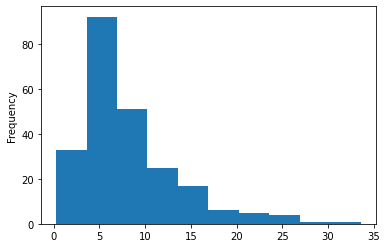

In [16]:
#Check the distribution of values for the year 2021
df2['2021'].plot.hist(); 

Right skewed distribution.

In [17]:
df[['2021']].describe()

,2021
count,235.000000
mean,8.219660
std,5.506914
min,0.260000
25%,4.750000
50%,6.580000
75%,10.245000
max,33.560000


In [18]:
#check for outliers in last three years 2019, 2020, 2021

In [19]:
df2[['2019','2020','2021']].describe()

,2019,2020,2021
count,235.000000,235.000000,235.000000
mean,7.087362,8.278809,8.219660
std,5.129146,5.470319,5.506914
min,0.100000,0.210000,0.260000
25%,3.805000,4.620000,4.750000
50%,5.530000,6.800000,6.580000
75%,8.605000,10.230000,10.245000
max,28.470000,29.220000,33.560000


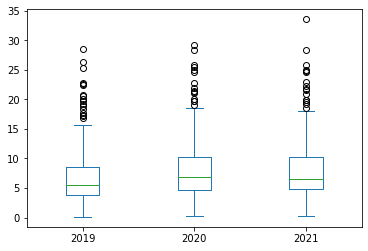

In [20]:
#box plot
df2[['2019','2020','2021']].plot.box();
# lower whisker Q1- 1.5 * I.Q, Upper whisker Q1 + 1.5 * I.Q, middle line- Median

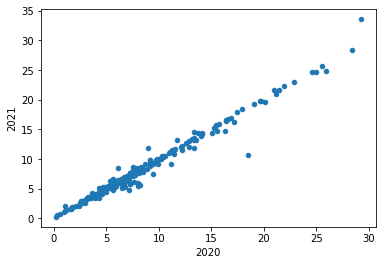

In [21]:
#Relationship between unemployment rate in 2020 and unemployment rate in 2021
df2.plot.scatter(x='2020', y='2021'); 

The Unemployment Rates are Positively Correlated.

In [22]:
#calculating correlation coefficient
df[['2020','2021']].corr()

,2020,2021
2020,1.000000,0.987844
2021,0.987844,1.000000


In [23]:
df['2021'].describe()

count    235.000000
mean       8.219660
std        5.506914
min        0.260000
25%        4.750000
50%        6.580000
75%       10.245000
max       33.560000
Name: 2021, dtype: float64

In [39]:
#Create categorical variables for 2021 unemployment rate for 'low','medium','moderately_high', 'high'
bin_edges= df2['2021'].describe()[3:].values
bin_edges

array([ 0.26 ,  4.75 ,  6.58 , 10.245, 33.56 ])

In [25]:
bin_names = ['low','medium','moderately_high', 'high' ]
df2['unemployment_levels_2021'] = pd.cut(df2['2021'], bin_edges, labels=bin_names);

In [26]:
df_cat =df2[['country_name', '2021', 'unemployment_levels_2021']]

In [27]:
df_cat.sample(10)

,country_name,2021,unemployment_levels_2021
163,Peru,4.83,medium
65,European Union,7.04,moderately_high
215,Tunisia,16.82,high
224,St. Vincent and the Grenadines,21.62,high
27,Bhutan,4.33,low
102,Jamaica,9.18,moderately_high
193,Small states,10.37,high
83,"Hong Kong SAR, China",5.32,medium
150,New Caledonia,16.57,high
188,Somalia,19.86,high


In [28]:
#All countries with high unemployment levels
df_cat[df_cat['unemployment_levels_2021'] == 'high']

,country_name,2021,unemployment_levels_2021
1,Afghanistan,13.28,high
4,Albania,11.82,high
5,Arab World,11.63,high
7,Argentina,10.90,high
8,Armenia,20.90,high
19,"Bahamas, The",13.24,high
20,Bosnia and Herzegovina,15.22,high
24,Brazil,14.40,high
25,Barbados,10.41,high
28,Botswana,24.72,high


#### Using groupby

In [29]:
#count of unemployment levels for all categories in 2021
df_cat.groupby('unemployment_levels_2021')[['2021']].count()

,2021
unemployment_levels_2021,
low,58
medium,59
moderately_high,58
high,59


In [30]:
#average unemployment level for all categories in 2021
df_cat.groupby('unemployment_levels_2021')[['2021']].mean()

,2021
unemployment_levels_2021,
low,3.227931
medium,5.661525
moderately_high,8.082414
high,15.954746


In [31]:
#Get the top 10 countries with the highest unemployment rate in 2021
top_ten=df2[['country_name','2021']].nlargest(10,columns='2021')

In [40]:
top_ten

,country_name,2021
232,South Africa,33.56
49,Djibouti,28.39
199,Eswatini,25.76
172,West Bank and Gaza,24.90
28,Botswana,24.72
123,Lesotho,24.60
39,"Congo, Rep.",23.01
70,Gabon,22.26
149,Namibia,21.68
224,St. Vincent and the Grenadines,21.62


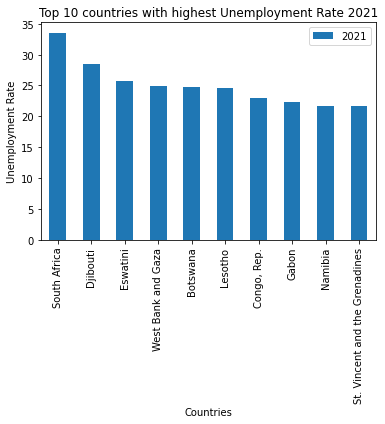

In [33]:
top_ten.plot.bar(x='country_name', y='2021', title='Top 10 countries with highest Unemployment Rate 2021', ylabel='Unemployment Rate', xlabel='Countries');

In [34]:
#select the details for nigeria
df_nig=df2[df2['country_name'] == 'Nigeria']
df_nig

,country_name,country_code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,unemployment_levels_2021
152,Nigeria,NGA,3.77,3.74,3.7,4.56,4.31,7.06,8.39,8.46,8.53,9.71,9.79,moderately_high


In [35]:
df_nig.iloc[0]

country_name                        Nigeria
country_code                            NGA
2011                                   3.77
2012                                   3.74
2013                                    3.7
2014                                   4.56
2015                                   4.31
2016                                   7.06
2017                                   8.39
2018                                   8.46
2019                                   8.53
2020                                   9.71
2021                                   9.79
unemployment_levels_2021    moderately_high
Name: 152, dtype: object

In [36]:
data_slice=df_nig.iloc[0][2:-2]
data_slice

2011    3.77
2012    3.74
2013     3.7
2014    4.56
2015    4.31
2016    7.06
2017    8.39
2018    8.46
2019    8.53
2020    9.71
Name: 152, dtype: object

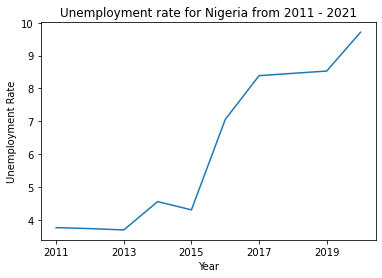

In [37]:
#plot the unmployment rate in Nigeria for the the past 10 years
data_slice.plot(kind='line', title='Unemployment rate for Nigeria from 2011 - 2021', xlabel='Year', ylabel='Unemployment Rate' );